<a href="https://colab.research.google.com/github/tombro27/Iris_kmeans/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Required Libraries**

In [1]:
import io
from google.colab import files

import pandas as pd   
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## **Uploading the Dataset**

In [2]:
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

df.head()

Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Some Data Insights

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
X=df.iloc[:,1:5].values
X.shape

(150, 4)

## Inertia

In [6]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

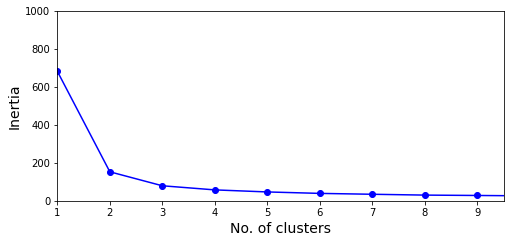

In [20]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("No. of clusters", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 9.5, 0, 1000])
plt.show()

The inertia drops very quickly as we increase k up to 2, it decreases slightly between 2 and 3, but then it
decreases much more slowly as we keep increasing k. This curve has roughly the
shape of an arm, and there is an “elbow” at k = 2 or 3. So, if we did not know better, 2
would be a good choice. But we should look more into it as having only 2 cluster might not be a good idea.

## Silhouette Scores

In [8]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

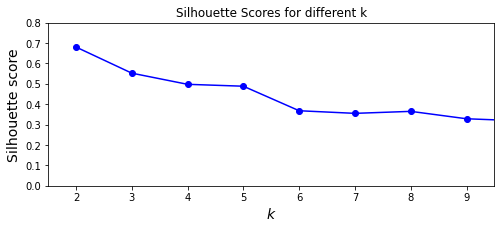

In [11]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.5, 9.5, 0, 0.8])
plt.title("Silhouette Scores for different k")
plt.show()

As we can see, this visualization is much richer than the previous one: although it
confirms that k = 2 is a very good choice, it also underlines the fact that k = 3 is quite
good as well, and much better than k = 4 or 5. This was not visible when comparing
inertias.

But there is something more to it.

An even more informative visualization is obtained when we plot a silhouette diagram

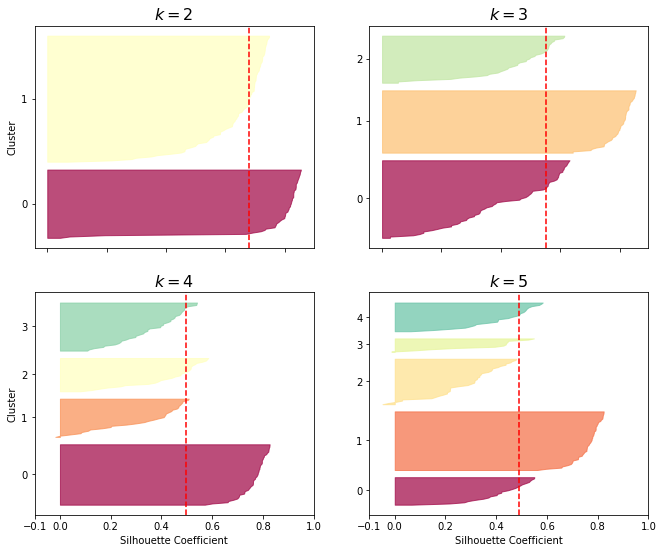

In [10]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2,3, 4, 5):
    plt.subplot(2, 2, k-1 )
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

We can see that when k = 4 and when k = 5, we get bad clusters. But when k = 2
or k = 3, the clusters look pretty good: most instances extend beyond the dashed line,
to the right and closer to 1.0. When k = 2, the cluster at index 1 is rather big. When k = 3, all clusters have similar sizes. So, even though the
overall silhouette score from k = 2 is slightly greater than for k = 3, it seems like a
good idea to use k = 3 to get clusters of similar sizes.


# So, we finally select k=3